/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.9441860465116279
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       254
           1       0.96      0.90      0.93       176

    accuracy                           0.94       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.94      0.94       430

Test Accuracy: 0.9372093023255814
Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       291
           1       0.92      0.88      0.90       139

    accuracy                           0.94       430
   macro avg       0.93      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430


Example feature values for prediction:
Age: 75
Gender: 1
Ethnicity: 0
EducationLevel: 2
BMI: 27.5
Smoking: 0
AlcoholConsumption: 10.0
PhysicalActivity: 4.0
DietQuality: 5.0
SleepQuality: 6.0
FamilyHistoryAlz

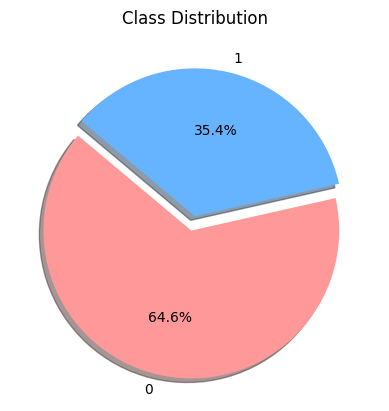

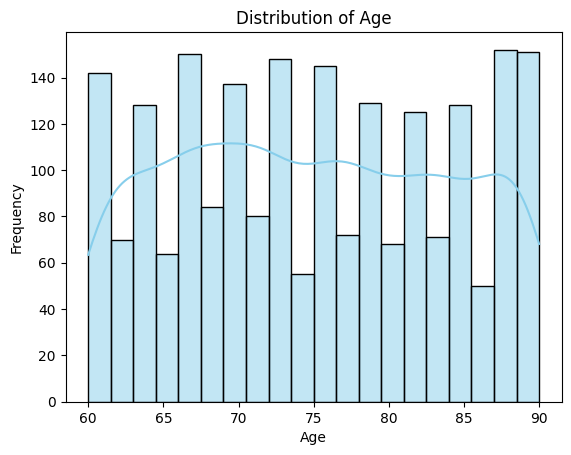

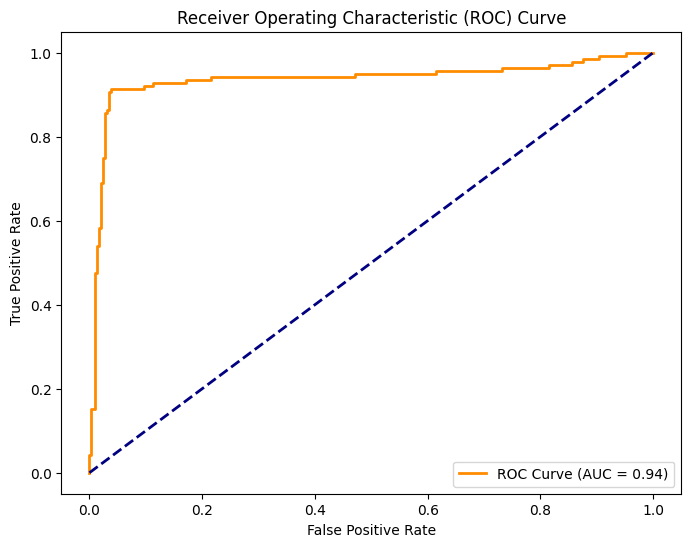

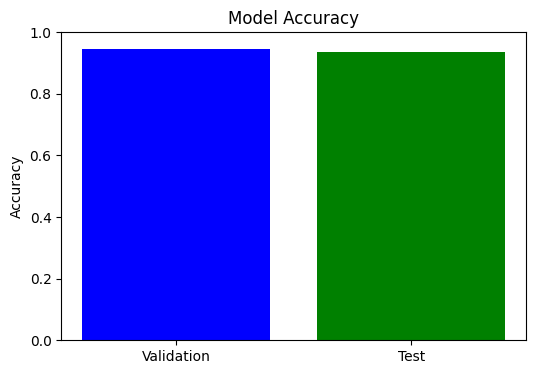

<Figure size 1200x800 with 0 Axes>

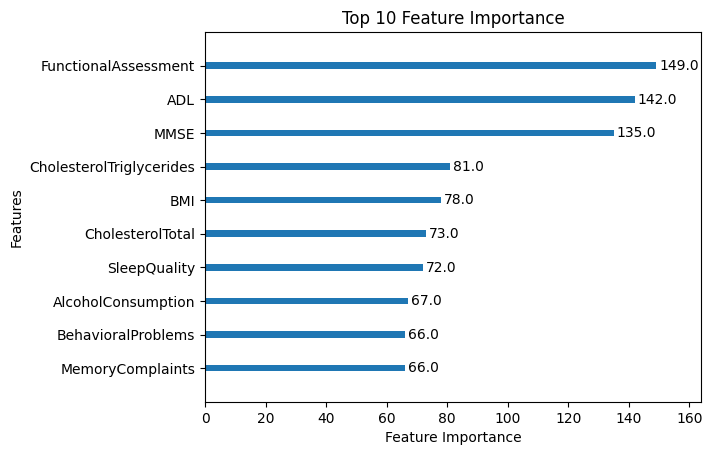

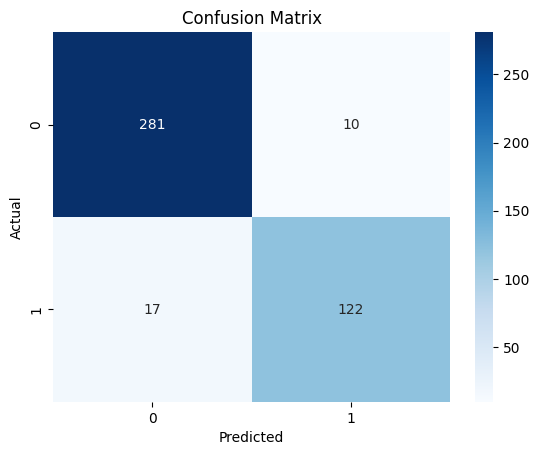

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Load and preprocess the dataset
data = pd.read_csv('/content/drive/MyDrive/alzheimers_disease_data.csv')

# Select features and target
features = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
target = data['Diagnosis']

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Test the model on the test set
y_test_pred = xgb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Function to take user input for prediction
def get_user_input(feature_names):
    print("\nPlease enter the values for the following features:")
    user_input = []
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Example feature values for testing (adjust as needed)
example_values = {
    'Age': 75,
    'Gender': 1,
    'Ethnicity': 0,
    'EducationLevel': 2,
    'BMI': 27.5,
    'Smoking': 0,
    'AlcoholConsumption': 10.0,
    'PhysicalActivity': 4.0,
    'DietQuality': 5.0,
    'SleepQuality': 6.0,
    'FamilyHistoryAlzheimers': 1,
    'CardiovascularDisease': 0,
    'Diabetes': 0,
    'Depression': 1,
    'HeadInjury': 0,
    'Hypertension': 1,
    'SystolicBP': 130,
    'DiastolicBP': 85,
    'CholesterolTotal': 200,
    'CholesterolLDL': 130,
    'CholesterolHDL': 50,
    'CholesterolTriglycerides': 150,
    'MMSE': 25,
    'FunctionalAssessment': 18,
    'MemoryComplaints': 3,
    'BehavioralProblems': 2,
    'ADL': 20,
    'Confusion': 1,
    'Disorientation': 1,
    'PersonalityChanges': 2,
    'DifficultyCompletingTasks': 1,
    'Forgetfulness': 3
}

# Display example input
print("\nExample feature values for prediction:")
for key, value in example_values.items():
    print(f"{key}: {value}")

# Predict based on example input
example_data = np.array(list(example_values.values())).reshape(1, -1)
example_prediction = xgb_model.predict(example_data)
print(f"\nPredicted class (Diagnosis) for example input: {example_prediction[0]}")

# Get user input for prediction
feature_names = features.columns.tolist()
user_data = get_user_input(feature_names)

# Predict the outcome based on user input
prediction = xgb_model.predict(user_data)
predicted_class = prediction[0]

print(f"\nThe predicted class (Diagnosis) is: {predicted_class}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from xgboost import plot_importance

# --- Visualization Code ---

# 1. Class Distribution Pie Chart
def plot_class_distribution(target):
    class_counts = target.value_counts()
    labels = class_counts.index
    sizes = class_counts.values
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # explode the 1st slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(target)

# 2. Feature Distribution (Example: Age Distribution)
def plot_feature_distribution(features, feature_name):
    sns.histplot(features[feature_name], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

plot_feature_distribution(features, 'Age')

# 3. ROC Curve for Test Set
def plot_roc_curve(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(xgb_model, X_test, y_test)

# 4. Accuracy Curve
def plot_accuracy_curve(model, X_val, y_val, X_test, y_test):
    val_acc = accuracy_score(y_val, model.predict(X_val))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 4))
    plt.bar(['Validation', 'Test'], [val_acc, test_acc], color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

plot_accuracy_curve(xgb_model, X_val, y_val, X_test, y_test)

# 5. Feature Importance (XGBoost Specific)
def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(12, 8))
    plot_importance(model, importance_type='weight', max_num_features=10, xlabel='Feature Importance', grid=False)
    plt.title("Top 10 Feature Importance")
    plt.show()

plot_feature_importance(xgb_model, features.columns)
1
411
# Additional Confusion Matrix Heatmap
def plot_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(xgb_model, X_test, y_test)